In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [178]:
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows Ïö©) ÌïúÍ∏Ä Ï∂úÎ†•ÏùÑ ÏúÑÌïú Í∏ÄÍº¥ ÏÑ§Ï†ï
#plt.rcParams['font.family'] = 'AppleGothic'  # (MAC, Î¶¨ÎàÖÏä§ Ïö©)
plt.rcParams['axes.unicode_minus'] = False    # Î¨∏Ïûê - (ÎßàÏù¥ÎÑàÏä§) Ï†ïÏÉÅ Ï∂úÎ†•ÏùÑ ÏúÑÌïú ÏΩîÎìú

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = 99
warnings.filterwarnings('ignore')

## data ÏÇ¥Ìé¥Î≥¥Í∏∞

In [179]:
df = pd.read_excel('closetshare.xlsx')
df = df.rename(columns=str.lower)

In [180]:
df.sort_values('user').sort_values('reg_date').tail(30)

brandnm                                           goodsnm  \
891         Studio Tomboy  button basic pattern singlebreasted-jacket khaki   
895                 Gucci                       vintage web cross bag brown   
893                  Maje              pocket basic pattern jump-suit brown   
897                 Gucci                   microssima emily mini bag black   
837                McGinn                    flower lace layered dress pink   
838              Max Mara                 classic mood check pattern jacket   
864       Banana Republic                  button basic pattern pants brown   
860         Louis Vuitton                 verni mini clutch chain bag black   
874    Yves Saint Laurent                  chevron quilting cross bag black   
859                 Prada                 basic pattern padding-outer black   
865                   Cos                 pocket basic pattern jacket beige   
877         Saint Laurent                leather tassel cross body bag gray   
880                Imvely                ruffle flower pattern A-Line dress   
881            Since then       gather flower pattern A-Line dress burgundy   
871                 Gucci               GG marmont quilted-leather belt bag   
884        Christian Dior                     lucky badges handle bag black   
882       & Other Stories          ribbon flower pattern A-Line dress multi   
870           Thom Browne                   basic pattern sweat-shirts grey   
856                  Nain                            wrap detail coat beige   
861                 Fendi           stripe pattern two way bucket bag brown   
858              Burberry           button basic pattern wool cardigan grey   
857                Theory                  pocket basic pattern skirt white   
848                 Gucci               graphics pattern sweat-shirts ivory   
854                 Gucci                           GG supreme clutch brown   
833   El estilo de Claire                   frill stripe knit cardigan muti   
351                Lanvin                      banding point jumper skyblue   
265                 Gucci                              mamont chain bag red   
746                 Fendi                    monogram zucchino shoulder bag   
564                 Gucci                           leather point cross bag   
1254                Fendi                              back to school bag 1   

          user   reg_date order_date p_type sub_type app_yn  
891   a1151309 2021-03-29 2021-03-29  4days        O      Y  
895   a1151303 2021-03-29 2021-03-29  7days       BA    NaN  
893   a1151307 2021-03-29 2021-03-29  7days        D      Y  
897   a1151297 2021-03-29 2021-03-29  4days       BA      Y  
837   a1151265 2021-03-29 2021-03-31  4days        D      Y  
838   a1151260 2021-03-29 2021-03-31  7days        O      Y  
864   a1151213 2021-03-29 2021-03-31  4days        B      Y  
860   a1151301 2021-03-29 2021-03-31  4days       BA      Y  
874   a1151433 2021-03-30 2021-03-30  4days       BA    NaN  
859   a1151457 2021-03-30 2021-03-31  4days        O      Y  
865   a1151437 2021-03-30 2021-03-31  4days        O      Y  
877   a1151413 2021-03-30 2021-03-30  4days       BA      Y  
880   a1151410 2021-03-30 2021-03-30  4days        D      Y  
881   a1151410 2021-03-30 2021-03-30  4days        D      Y  
871   a1151404 2021-03-30 2021-03-30  7days       BA      Y  
884   a1151362 2021-03-30 2021-03-30  4days       BA      Y  
882   a1151410 2021-03-30 2021-03-30  4days        D      Y  
870   a1151404 2021-03-30 2021-03-30  4days        T      Y  
856   a1151465 2021-03-31 2021-03-31  7days        O    NaN  
861   a1151466 2021-03-31 2021-03-31  7days       BA      Y  
858   a1151479 2021-03-31 2021-03-31  4days        O      Y  
857   a1151481 2021-03-31 2021-03-31  4days        B      Y  
848   a1151496 2021-03-31 2021-03-31  7days        T      Y  
854   a1151499 2021-03-31 2021-03-31  4days       BA      Y  
833   a1151564 202

In [181]:
df[df['reg_date'].notnull()].sort_values('user').sort_values('reg_date').reset_index().iloc[:,3:5]

user   reg_date
0       a11612 2017-06-24
1       a11803 2017-07-02
2       a13637 2018-03-09
3       a13741 2018-03-20
4       a13934 2018-03-27
...        ...        ...
1461  a1151479 2021-03-31
1462  a1151481 2021-03-31
1463  a1151496 2021-03-31
1464  a1151499 2021-03-31
1465  a1151564 2021-03-31

[1466 rows x 2 columns]

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   brandnm     1442 non-null   object        
 1   goodsnm     1471 non-null   object        
 2   user        1471 non-null   object        
 3   reg_date    1466 non-null   datetime64[ns]
 4   order_date  1471 non-null   datetime64[ns]
 5   p_type      1471 non-null   object        
 6   sub_type    1471 non-null   object        
 7   app_yn      1295 non-null   object        
dtypes: datetime64[ns](2), object(6)
memory usage: 92.1+ KB


In [183]:
df.describe()

brandnm                          goodsnm      user  \
count     1442                             1471      1471   
unique     245                              979      1234   
top      Gucci  chevron quilted cross bag black  a1149461   
freq       232                               23        11   
first      NaN                              NaN       NaN   
last       NaN                              NaN       NaN   

                   reg_date           order_date p_type sub_type app_yn  
count                  1466                 1471   1471     1471   1295  
unique                  368                   90      2        6      1  
top     2021-03-16 00:00:00  2021-03-24 00:00:00  4days       BA      Y  
freq                     44                   47    894      692   1295  
first   2017-06-24 00:00:00  2021-01-01 00:00:00    NaN      NaN    NaN  
last    2021-03-31 00:00:00  2021-03-31 00:00:00    NaN      NaN    NaN

In [184]:
df.head()

brandnm                                    goodsnm      user  \
0                Gucci         flower dionysus shoulder bag beige   a161237   
1  El estilo de Claire                 beads cropped jacket black  a1140859   
2                Danha  embroidery point oriental mini skirt blue  a1140859   
3                Danha                  graphics pattern top pink  a1140859   
4      Burberry London     buckle basic pattern zipup-jumper navy  a1140740   

    reg_date order_date p_type sub_type app_yn  
0 2019-12-06 2021-01-15  7days       BA      Y  
1 2021-01-02 2021-01-15  4days        O    NaN  
2 2021-01-02 2021-01-15  4days        B    NaN  
3 2021-01-02 2021-01-15  4days        T    NaN  
4 2021-01-01 2021-01-15  7days        O      Y

## Í≤∞Ï∏°Ïπò

In [185]:
df.isna().sum()

brandnm        29
goodsnm         0
user            0
reg_date        5
order_date      0
p_type          0
sub_type        0
app_yn        176
dtype: int64

In [186]:
# ÌåÄ Í≥µÌÜµ
# app_yn Í∞í 0, 1 ÏπòÌôò
df['app_yn'] = df['app_yn'].fillna(0)
df.loc[(df.app_yn == 'Y'), 'app_yn'] = 1

In [187]:
df.isna().sum()

brandnm       29
goodsnm        0
user           0
reg_date       5
order_date     0
p_type         0
sub_type       0
app_yn         0
dtype: int64

In [188]:
# reg_date NAÍ∞í Ï±ÑÏö∞Í∏∞
df[df['reg_date'].isna()]

brandnm                         goodsnm      user reg_date order_date  \
265    Gucci            mamont chain bag red  a1144008      NaT 2021-01-21   
351   Lanvin    banding point jumper skyblue  a1142855      NaT 2021-01-18   
564    Gucci         leather point cross bag  a1146490      NaT 2021-02-18   
746    Fendi  monogram zucchino shoulder bag  a1145478      NaT 2021-02-04   
1254   Fendi            back to school bag 1  a1149094      NaT 2021-03-12   

     p_type sub_type app_yn  
265   7days       BA      1  
351   7days        O      0  
564   4days       BA      1  
746   4days       BA      0  
1254  7days       BA      1

In [189]:
df['user_id'] = 0

for i in range(len(df)):
    df['user_id'][i] = df['user'][i][1:]

In [190]:
df['user_id'] = df['user_id'].astype(int)

In [191]:
df.loc[(df.user_id == 1144008), 'reg_date'] = pd.to_datetime('2021-01-21')
df.loc[(df.user_id == 1142855), 'reg_date'] = pd.to_datetime('2021-01-13') # Ïö∞ÏÑ† 13ÏùºÎ°ú Ï∂îÍ∞Ä
df.loc[(df.user_id == 1146490), 'reg_date'] = pd.to_datetime('2021-02-15')
df.loc[(df.user_id == 1145478), 'reg_date'] = pd.to_datetime('2021-02-04')
df.loc[(df.user_id == 1149094), 'reg_date'] = pd.to_datetime('2021-03-12')

In [192]:
df.isna().sum()

brandnm       29
goodsnm        0
user           0
reg_date       0
order_date     0
p_type         0
sub_type       0
app_yn         0
user_id        0
dtype: int64

In [193]:
# brand NA 29Í∞ú
# brand name NAÍ∞íÎì§ÏùÄ Ï†ÑÎ∂Ä TPÏù∏ Í≤ΩÏö∞Ïù¥Îã§.
# ÏÉÅÌïòÏùòÎ°ú Ï™ºÍ∞úÏÑú 2Í∞íÏúºÎ°ú ÎÑ£ÏúºÎ†§Í≥† ÌñàÏßÄÎßå, Îã§Î•∏ ÌïúÎ≤å ÏÉÅÌíàÎì§Ïù¥Îûë Íµ¨Îß§ Í∞ÄÍ≤©Ïù¥ ÎòëÍ∞ôÎã§. ÏïΩÍ∞Ñ Îñ®Ïù¥ ÎäêÎÇå
# Îî∞ÎùºÏÑú ÏÉÅÌíàÏùÑ Ï∞æÏïÑÏÑú brand nameÎßå Ï±ÑÏõåÎÑ£ÏóàÎã§.
# ÏÉÅÌïòÏùòÍ∞Ä ÏÑúÎ°ú Î∏åÎûúÎìúÍ∞Ä Îã§Î•∏ Í≤ΩÏö∞, Îçî Ïù∏ÏßÄÎèÑÍ∞Ä ÎÜíÏùÄ Î∏åÎûúÎìú Î™ÖÏùÑ Ï±ÑÏõåÎÑ£ÏóàÎã§.

In [194]:
df.loc[146, 'brandnm'] = 'Fendi' # ÏÉÅÏùòÎäî YCH ?
df.loc[147, 'brandnm'] = 'Mojosphine'
df.loc[160, 'brandnm'] = 'Fayewoo'
df.loc[220, 'brandnm'] = 'Nakes'
df.loc[267, 'brandnm'] = 'Vw vera Wang'
df.loc[282, 'brandnm'] = 'Gucci'
df.loc[285, 'brandnm'] = 'Chanel'
df.loc[329, 'brandnm'] = 'Plastic Island'
df.loc[342, 'brandnm'] = 'Sonia Rykiel'
df.loc[368, 'brandnm'] = 'El estilo de Claire'
df.loc[373, 'brandnm'] = 'Moschino'
df.loc[443, 'brandnm'] = 'Saint James'
df.loc[505, 'brandnm'] = 'EunjoKoh'
df.loc[525, 'brandnm'] = 'Vw vera Wang'
df.loc[526, 'brandnm'] = 'Rejina Pyo'
df.loc[544, 'brandnm'] = 'Miu Miu'
df.loc[765, 'brandnm'] = 'El estilo de Claire'
df.loc[766, 'brandnm'] = 'Miu Miu'
df.loc[879, 'brandnm'] = 'Olive des Olive'
df.loc[892, 'brandnm'] = 'Sandro'
df.loc[931, 'brandnm'] = 'Balmain' # + Îã§Î•∏ Î∏åÎûúÎìú
df.loc[946, 'brandnm'] = 'Fayewoo'
df.loc[957, 'brandnm'] = 'It michaa'
df.loc[1062, 'brandnm'] = 'SJYP' # ÌòÑÏû¨ ÏÉÅÏùòÎäî ÏûàÎäîÎç∞ ÌïòÏùòÎäî ÏóÜÏùå. Ïù¥Ï†ú ÏÉÅÏùòÎßå Î†åÌä∏ÌïòÎäîÎìØ. ÏÉÅÏùò Î∏åÎûúÎìú ÎÑ£Ïùå
df.loc[1210, 'brandnm'] = 'Mine' # Mine, Chee U Îëê Î∏åÎûúÎìúÏóêÏÑú ÎòëÍ∞ôÏùÄ Ïù¥Î¶ÑÏùò Ìà¨ÌîºÏä§ ÏÉÅÌíàÏù¥ ÏûàÏùå. Ïù∏ÏßÄÎèÑÏóê Îî∞Îùº MineÏúºÎ°ú ÎÑ£Ïùå
df.loc[1385, 'brandnm'] = 'Mojosphine'
df.loc[1405, 'brandnm'] = 'Plastic Island'

In [195]:
# ÎÑ£ÏúºÎ©¥ÏÑú ÏïåÏïÑÎÇ∏ Ïì∏Î™®ÏóÜÎäî ÏÇ¨Ïã§
# goods nameÏùÄ Ïó¨Îü¨ Îã®Ïñ¥Ïùò Ï°∞Ìï©Ïù¥Îã§. Î≤ÑÌäºÏù¥ ÏûàÍ≥† Ìå®ÌÑ¥Ïù¥ ÏóÜÎäî Í≤ÄÏùÄÏÉâ ÏûêÏºìÏù¥Î©¥ button + basic + pattern + jacket + black Ïù¥Î†áÍ≤å Ïì∞Îäî Ïãù
# Îî∞ÎùºÏÑú Î∏åÎûúÎìúÎäî Îã§Î•¥ÏßÄÎßå ÏÉÅÌíàÎ™ÖÏùÄ Í∞ôÏùÄ Ï†úÌíàÏù¥ ÎßéÎã§.
# button basic pattern jacket black Í≤ÄÏÉâÌï¥Î≥¥Î©¥ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

# 2Í∞úÎäî Î™ª ÎÑ£ÏóàÎã§„Ö†
# df.loc[993, 'goodsnm'] : ÏÉÅÌïòÏùò Îã§ ÏóÜÏùå.. ÌåêÎß§Ï§ëÏßÄÏù∏ÎìØ
# df.loc[1160, 'goodsnm'] : Ìà¨ÌîºÏä§ ÏÉÅÌíàÏùÄ ÏóÜÏñ¥ÏßÑÎìØ. ÏÉÅÌïòÏùò Îî∞Î°úÎäî ÏûàÎäîÎç∞ Î∏åÎûúÎìúÍ∞Ä ÎßéÏïÑÏÑú ÎåÄÏûÖÌïòÍ∏∞ ÌûòÎì¨

In [196]:
df.isna().sum()

brandnm       2
goodsnm       0
user          0
reg_date      0
order_date    0
p_type        0
sub_type      0
app_yn        0
user_id       0
dtype: int64

In [197]:
# 2Í∞úÎäî N/A ? drop? Ïö∞ÏÑ† N/A
df = df.fillna('N/A')

## Feature Engineering

In [198]:
# Í∞ÄÏûÖ Ï†ïÎ≥¥ Í¥ÄÎ†® ÎÇ†Ïßú Î≥ÄÏàò Ï∂îÍ∞Ä 
df['reg_date']=pd.to_datetime(df['reg_date'])
df['reg_year']=df['reg_date'].dt.strftime('%Y')
df['reg_month']=df['reg_date'].dt.strftime('%m')## Feature Engineering
df['reg_yearmonth']=df['reg_date'].dt.strftime('%Y-%m')
df['reg_dayofweek']=df['reg_date'].dt.dayofweek
df['order_month']=df['order_date'].dt.month
df['order_week']=df['order_date'].dt.week
df['order_day']=df['order_date'].dt.day
df['order_dayofweek']=df['order_date'].dt.dayofweek
df['seg_new'] = np.where(df['reg_year'].values == '2021', 1, 0)

# date continuousÎ≥ÄÌôò
df['order_date']=pd.to_datetime(df['order_date']).dt.date
df['reg_date']=pd.to_datetime(df['reg_date']).dt.date

# Íµ¨Îß§ Ï†ÑÌôò ÎÇ†Ïßú
df['first'] = (df['order_date'] - df['reg_date']).dt.days
df['isfirst'] = np.where(df['first'].values <= 1, True, False)
df['level'] = np.where(df['first'].values == 0, 'ÎãπÏùºÍµ¨Îß§', np.where(df['first'].values == 1, '1ÏùºÏù¥ÎÇ¥Íµ¨Îß§', np.where(df['first'].values < 7, '1Ï£ºÏùºÏù¥ÎÇ¥Íµ¨Îß§', np.where(df['first'].values < 30, '1Îã¨Ïù¥ÎÇ¥Íµ¨Îß§', '1Îã¨Í≤ΩÍ≥ºÌõÑÍµ¨Îß§'))))

In [199]:
# 2021 top 10 list
luxury_list=['GUCCI','Louis Vuitton','Cartier','Chanel','Hermes','Ferrari','Rolex','Dior','Christian Dior','COACH','Estee Lauder','Tiffany & Co.',
'Guerlain','Burberry','Prada','Lanc√¥me','Omega','Clarins','Bulgari','Moncler','Saint Laurent','SK-II','McLaren','TAG Heuer','Givenchy','Lamborghini','Armani','Bottega Veneta','Rolls- Royce',
'Bentley','Aston Martin','Loewe','Maserati','Van Cleef & Arpels','Valentino','Salvatore Ferragamo','Shiseido','Sulwhasoo','Tissot','Versace','Bobbi Brown','Montblanc','Tom Ford','Longines','Cle de Peau Beaute','Jaeger-LeCoultre',
'Celine','Dolce & Gabbana','Miu Miu','Fendi']
# brandnm luxury 
df['brandnm_luxury']=np.where(df['brandnm'].isin(luxury_list), 1,0)

In [200]:
# df_user Ïú†Ï†Ä Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌÖåÏù¥Î∏îÏÉùÏÑ±
df_user = df.groupby(['user','reg_date','reg_yearmonth','order_date','order_month','order_week','order_dayofweek'])['goodsnm'].count().to_frame().reset_index().rename(columns={'goodsnm':'order_count'}) 
ptype = df.pivot_table(index='user', columns='p_type',values= 'order_date',aggfunc='count').fillna(0).reset_index()
subtype = df.pivot_table(index='user', columns='sub_type',values= 'order_date',aggfunc='count').fillna(0).reset_index()
app = df.pivot_table(index='user', columns='app_yn',values= 'order_date',aggfunc='count').fillna(0).reset_index().rename(columns={'Y':'app'}) 
luxury=df.pivot_table(index='user',values= 'brandnm_luxury',aggfunc='sum').fillna(0).reset_index()

# merge
df_user = df_user.merge(ptype, how='left', on='user').merge(app, how='left', on='user').merge(subtype, how='left', on='user').fillna(0)
df_user.head(5)

user    reg_date reg_yearmonth  order_date  order_month  order_week  \
0  a1100548  2020-05-16       2020-05  2021-03-31            3          13   
1  a1100887  2020-05-19       2020-05  2021-03-29            3          13   
2  a1101514  2020-05-25       2020-05  2021-02-05            2           5   
3  a1101645  2020-05-26       2020-05  2021-02-23            2           8   
4  a1102068  2020-05-29       2020-05  2021-03-04            3           9   

   order_dayofweek  order_count  4days  7days    0    1    B   BA    D    O  \
0                2            2   2.00   0.00 0.00 2.00 1.00 1.00 0.00 0.00   
1                0            1   0.00   1.00 0.00 1.00 0.00 1.00 0.00 0.00   
2                4            1   1.00   0.00 0.00 1.00 0.00 0.00 0.00 1.00   
3                1            1   1.00   0.00 1.00 0.00 0.00 1.00 0.00 0.00   
4                3            1   0.00   1.00 0.00 1.00 0.00 1.00 0.00 0.00   

     T   TP  
0 0.00 0.00  
1 0.00 0.00  
2 0.00 0.00  
3 0.00 0.00  
4 0.00 0.00

In [201]:
# 2Í±¥ Ïù¥ÏÉÅ heavy userÎ°ú Í∑úÏ†ï
heavy_list=df_user.query('order_count>1').user.tolist()
df['seg_heavy']=np.where(df.user.isin(heavy_list),1,0)

## EDA

In [202]:
# 1. ÎÇ†ÏßúÎ≥Ñ ÌåêÎß§Îüâ Î≥ÄÌôî Ï∂îÏù¥

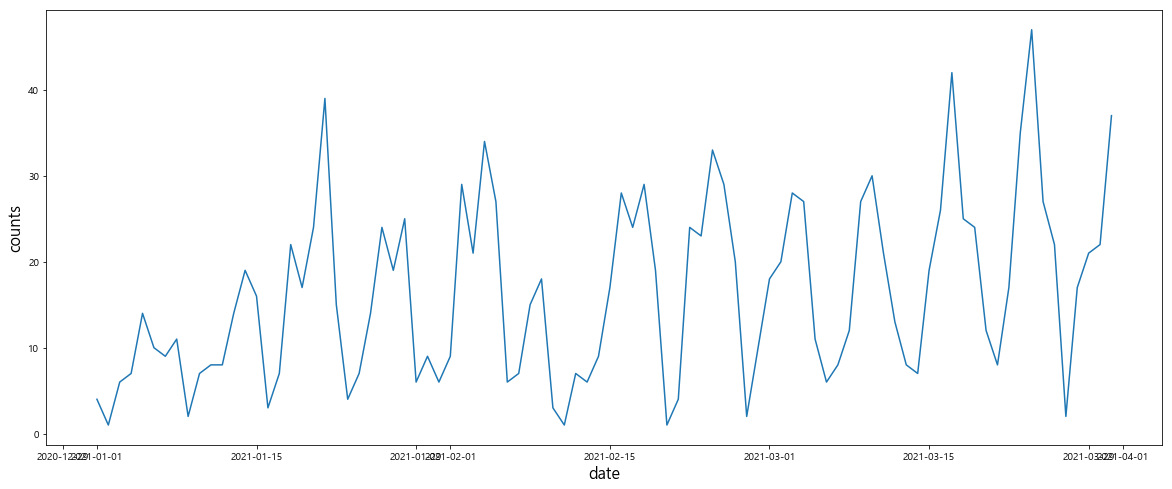

In [203]:
df_count = df.groupby('order_date')['user'].value_counts().groupby('order_date').sum().reset_index()

plt.figure(figsize=(20,8))
sns.lineplot(data = df_count,
             x = df_count['order_date'], y = df_count['user'])
plt.ylabel('counts', fontsize=16)
plt.xlabel('date', fontsize=16)
plt.show()


In [204]:
# 2. ÏöîÏùºÎ≥Ñ ÌåêÎß§Îüâ Î≥ÄÌôî Ï∂îÏù¥

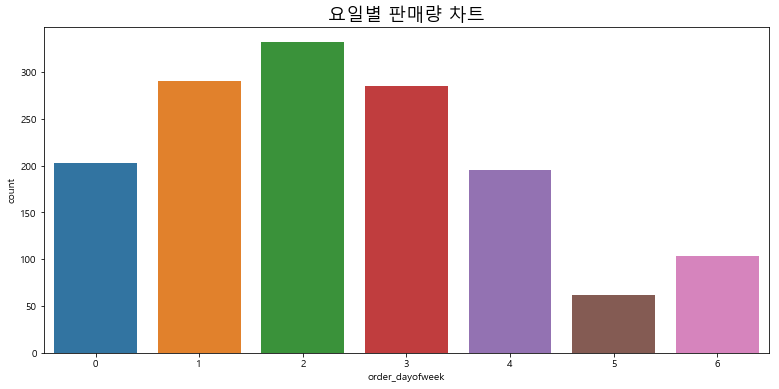

In [205]:
plt.figure(figsize=(13,6))
sns.countplot(data = df, x = 'order_dayofweek')
plt.title('ÏöîÏùºÎ≥Ñ ÌåêÎß§Îüâ Ï∞®Ìä∏', fontsize=18);


Ï†ïÎ¶¨ÌïòÎ©¥ ÏöîÏùºÎ≥Ñ ÌåêÎß§ÎüâÏùÄ ÌôîÏàòÎ™©Ïù¥ ÎßéÏùÄÎç∞ Î∞∞ÏÜ° + Î∞òÎÇ© Îì±ÏùÑ Í≥†Î†§ÌñàÏùÑ Îïå Í∏àÏöîÏùº, ÌÜ†ÏöîÏùºÏóê ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌïú Í≤ÉÏúºÎ°ú Î≥¥Ïó¨ÏßÑÎã§.


In [206]:
# order_date Î∂ÑÎ∞∞
df['order_date'].sort_values()
# 1Ïõî 1Ïùº ~ 3Ïõî 31Ïùº

135    2021-01-01
134    2021-01-01
133    2021-01-01
132    2021-01-01
131    2021-01-02
          ...    
856    2021-03-31
855    2021-03-31
854    2021-03-31
861    2021-03-31
849    2021-03-31
Name: order_date, Length: 1471, dtype: object

In [207]:
# userÏôÄ order_dateÍ∞Ä 1:1 Îß§Ïπ≠Ïù∏Í∞ÄÏöî? ÎÑ§
df.groupby(['user','order_date'], as_index=False).sum().value_counts().describe()

count   1234.00
mean       1.00
std        0.00
min        1.00
25%        1.00
50%        1.00
75%        1.00
max        1.00
dtype: float64

In [208]:
df['first'].value_counts()

0      352
1      147
3      119
2      107
5       32
      ... 
395      1
391      1
382      1
381      1
298      1
Name: first, Length: 324, dtype: int64

In [209]:
# Ï†ÑÏ≤¥ 1234Î™ÖÏùò user
df['user'].unique().shape

(1234,)

In [210]:
# Í∞ÄÏûÖ 1Ïùº Ïù¥ÎÇ¥ Ï†ÑÌôò Ïú†Ï†Ä 499Î™Ö
df.query('first <= 1').shape

(499, 23)

In [211]:
# ÏïΩ 40%Í∞Ä Í∞ÄÏûÖ ÌõÑ 1Ïùº Ïù¥ÎÇ¥ Íµ¨Îß§ Ï†ÑÌôò Ïú†Ï†Ä
499 / 1234

0.40437601296596437

In [212]:
# ÏõîÎ≥Ñ 1Ïùº Ïù¥ÎÇ¥ Íµ¨Îß§ Ï†ÑÌôò Ïú†Ï†ÄÎäî?
df_first = df.query('first <= 1').groupby('order_month')['first'].value_counts().groupby('order_month').sum().reset_index()
df_first

order_month  first
0            1     88
1            2    182
2            3    229

In [213]:
# ÏõîÎ≥Ñ Ï†ÑÏ≤¥ Íµ¨Îß§ Ïú†Ï†ÄÎäî?
df_all = df.groupby('order_month')['first'].value_counts().groupby('order_month').sum().reset_index()
df_all = df_all.rename(columns = {'first': 'all'}, inplace = False)
df_all

order_month  all
0            1  377
1            2  455
2            3  639

In [214]:
df_fa = pd.concat([df_first, df_all['all']], axis = 1)
df_fa

order_month  first  all
0            1     88  377
1            2    182  455
2            3    229  639

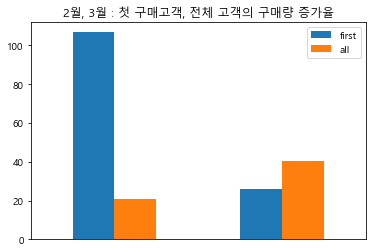

In [215]:
# 3. 2Ïõî, 3ÏõîÏùò Ï≤´ Íµ¨Îß§Í≥†Í∞ù, Ï†ÑÏ≤¥ Í≥†Í∞ùÏùò Íµ¨Îß§Îüâ Ï¶ùÍ∞ÄÏú®
(df_fa.pct_change()*100)[['first', 'all']].dropna().plot(kind = 'bar', rot = 0)
plt.xticks(np.arange(2, 3))
plt.title('2Ïõî, 3Ïõî : Ï≤´ Íµ¨Îß§Í≥†Í∞ù, Ï†ÑÏ≤¥ Í≥†Í∞ùÏùò Íµ¨Îß§Îüâ Ï¶ùÍ∞ÄÏú®');

In [216]:
#            2Ïõî   3Ïõî
# 1ÏùºÏù¥ÎÇ¥   106     25.8
# Ï†ÑÏ≤¥      20.7   40.4  (Îã®ÏúÑ : %)

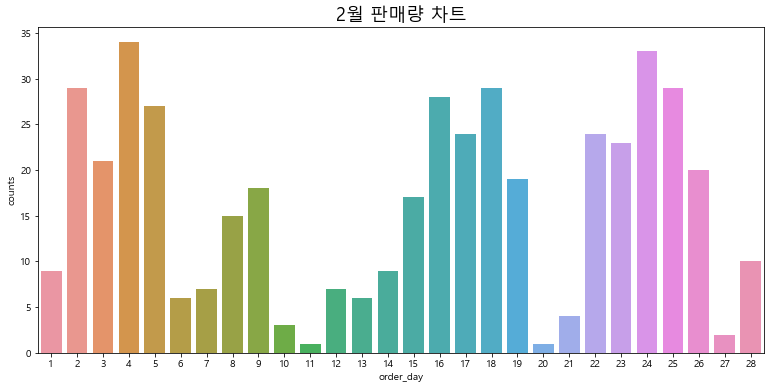

In [217]:
# Ï≤´ Íµ¨Îß§ Í≥†Í∞ùÏù¥ 2ÏõîÏóê Í∏âÏ¶ùÌñàÎã§.. Í∑∏ Ïù¥Ïú†Îäî?
plt.figure(figsize=(13,6))
sns.barplot(data = df.query('order_month==2').groupby('order_day')['user'].value_counts().groupby('order_day').sum().reset_index(), 
         x = 'order_day', y = 'user')
plt.ylabel('counts')
plt.title('2Ïõî ÌåêÎß§Îüâ Ï∞®Ìä∏', fontsize=18);

# ÎÇ†Ïßú Îç∞Ïù¥ÌÑ∞Îßå ÎÜìÍ≥† Î≥¥Î©¥ Ïûò Î™®Î•¥Í≤†Îã§. Ìï†Ïù∏ÌñâÏÇ¨Î•º ÏßÑÌñâÌñàÎÇò?

In [218]:
df.query('order_month==2').groupby('app_yn')['user'].value_counts().groupby('app_yn').sum().reset_index()

app_yn  user
0       0    47
1       1   408

In [219]:
df.query('order_month==2').groupby('brandnm')['user'].value_counts().groupby('brandnm').sum().reset_index().sort_values('user', ascending = False).head(20)

brandnm  user
52                 Gucci    76
28                Chanel    37
101        Saint Laurent    31
65         Louis Vuitton    27
90                 Prada    23
123   Yves Saint Laurent    14
112          Thom Browne    13
20              Burberry    12
48                 Fendi    11
73              Max Mara     9
78               Miu Miu     9
102               Sandro     7
12               Balmain     5
44   El estilo de Claire     5
119    Vivienne Westwood     5
62           Jill Stuart     5
26                Celine     5
30        Christian Dior     4
63                 Kenzo     4
38                  Dewl     4

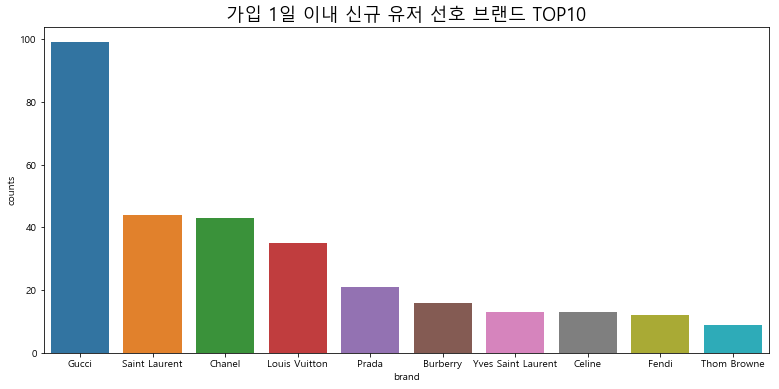

In [220]:
# 4. Ïã†Í∑ú Ïú†Ï†ÄÏùò ÏÑ†Ìò∏ Î∏åÎûúÎìúÎäî?
df_brand = df.query('isfirst == True')['brandnm'].value_counts().head(10).reset_index()
df_brand = df_brand.rename(columns = {'index': 'brand', 'brandnm':'counts'}, inplace = False)

plt.figure(figsize=(13,6))
sns.barplot(data = df_brand, 
         x = 'brand', y = 'counts')
plt.title('Í∞ÄÏûÖ 1Ïùº Ïù¥ÎÇ¥ Ïã†Í∑ú Ïú†Ï†Ä ÏÑ†Ìò∏ Î∏åÎûúÎìú TOP10', fontsize=18);

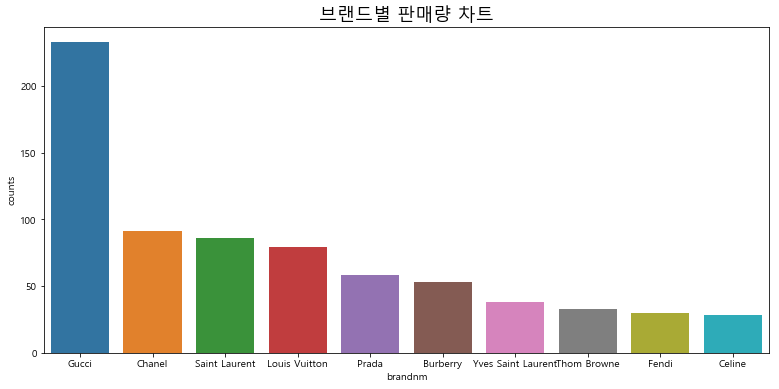

In [221]:
# Í∑∏Îüº Ï†ÑÏ≤¥ Ïú†Ï†ÄÍ∞Ä Í∞ÄÏû• ÎßéÏù¥ Íµ¨Îß§Ìïú Î∏åÎûúÎìúÎäî?
plt.figure(figsize=(13,6))
sns.barplot(data = df.groupby('brandnm')['user'].value_counts().groupby('brandnm').sum().sort_values(ascending = False).reset_index().head(10),
           x = 'brandnm', y = 'user')
plt.ylabel('counts')
plt.title('Î∏åÎûúÎìúÎ≥Ñ ÌåêÎß§Îüâ Ï∞®Ìä∏', fontsize=18);


In [222]:
# Íµ¨Ï∞å, ÏÉ§ÎÑ¨, ÏÉùÎ°úÎûë, Î£®Ïù¥ÎπÑÌÜµ, ÌîÑÎùºÎã§, Î≤ÑÎ≤ÑÎ¶¨, ÌÜ∞Î∏åÎùºÏö¥, ÌéúÎîî Îì±Ïùò Î™ÖÌíàÏûÑ
# ÏÇ¨ÎûåÎì§Ïù¥ Î≠îÍ∞Ä Ï§ëÏöîÌïú ÏûêÎ¶¨Ïóê Ï∞∏ÏÑùÌïòÍ∏∞ ÏúÑÌï¥, ÎòêÎäî SNS ÏóÖÎ°úÎìúÎ•º ÏúÑÌï¥ Î™ÖÌíà ÌïòÎÇò Í±∏ÏπòÍ≥† Ïã∂ÏùÑ Îïå Î†åÌä∏ÌïòÎäî ÎìØ
# Î≠îÍ∞Ä Î™ÖÌíà ÏïÖÏÑ∏ÏÇ¨Î¶¨ Î†åÌÉà ÏÑúÎπÑÏä§Î°úÏùò ÎπÑÏ¶àÎãàÏä§ Î∞©Ìñ• Ï†ÑÌôòÎèÑ ÏÉùÍ∞ÅÌï¥Î≥º Ïàò ÏûàÍ≤†Îã§.

<br>

## 2021ÎÖÑ Í∞ÄÏûÖÌïú Ïã†Í∑ú Ïú†Ï†ÄÏôÄ Ïù¥Ï†ÑÏóê Í∞ÄÏûÖÌïú Í∏∞Ï°¥ Ïú†Ï†ÄÏùò Ï∞®Ïù¥Îäî?

1. Ïã†Í∑ú/Í∏∞Ï°¥ Ïú†Ï†Ä sub_type 

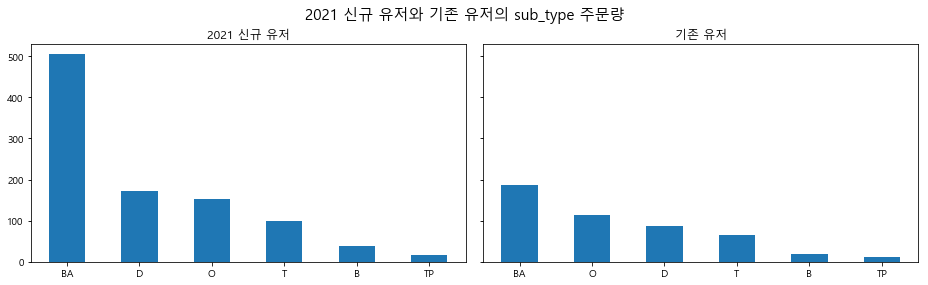

In [223]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(13,4), sharey=True)
fig.suptitle('2021 Ïã†Í∑ú Ïú†Ï†ÄÏôÄ Í∏∞Ï°¥ Ïú†Ï†ÄÏùò sub_type Ï£ºÎ¨∏Îüâ', fontsize=15)
df.query('seg_new==1').sub_type.value_counts().plot.bar(rot=0, title='2021 Ïã†Í∑ú Ïú†Ï†Ä', ax=axes[0])
df.query('seg_new==0').sub_type.value_counts().plot.bar(rot=0, title='Í∏∞Ï°¥ Ïú†Ï†Ä', ax=axes[1])

fig.tight_layout()
fig.subplots_adjust(top=0.85)

In [224]:
# Îëê Í∑∏Î£π Î™®Îëê Í∞ÄÎ∞©ÏùÑ ÎßéÏù¥ Íµ¨Îß§ÌñàÏßÄÎßå, ÎπÑÏú®ÏùÑ Î≥¥ÏïòÏùÑ Îïê, Ïã†Í∑ú Ïú†Ï†ÄÍ∞Ä Í∞ÄÎ∞©ÏùÑ Íµ¨Îß§Ìïú ÎπÑÏ§ëÏù¥ Îçî ÎÜíÎã§.

In [225]:
print('Ïã†Í∑ú Ïú†Ï†ÄÏùò Í∞ÄÎ∞© Íµ¨Îß§ ÎπÑÏú®ÏùÄ',round(df.query("seg_new == 1 and sub_type == 'BA'").shape[0]/df.query("seg_new == 1").shape[0] * 100,2), 'Ïù¥Îã§.')
print('Í∏∞Ï°¥ Ïú†Ï†ÄÏùò Í∞ÄÎ∞© Íµ¨Îß§ ÎπÑÏú®ÏùÄ',round(df.query("seg_new == 0 and sub_type == 'BA'").shape[0]/df.query("seg_new == 0").shape[0] * 100,2), 'Ïù¥Îã§.')

Ïã†Í∑ú Ïú†Ï†ÄÏùò Í∞ÄÎ∞© Íµ¨Îß§ ÎπÑÏú®ÏùÄ 51.22 Ïù¥Îã§.
Í∏∞Ï°¥ Ïú†Ï†ÄÏùò Í∞ÄÎ∞© Íµ¨Îß§ ÎπÑÏú®ÏùÄ 38.56 Ïù¥Îã§.


<br>

2. Ïã†Í∑ú/Í∏∞Ï°¥ Ïú†Ï†Ä Î∏åÎûúÎìú ÏÑ†Ìò∏ÎèÑ

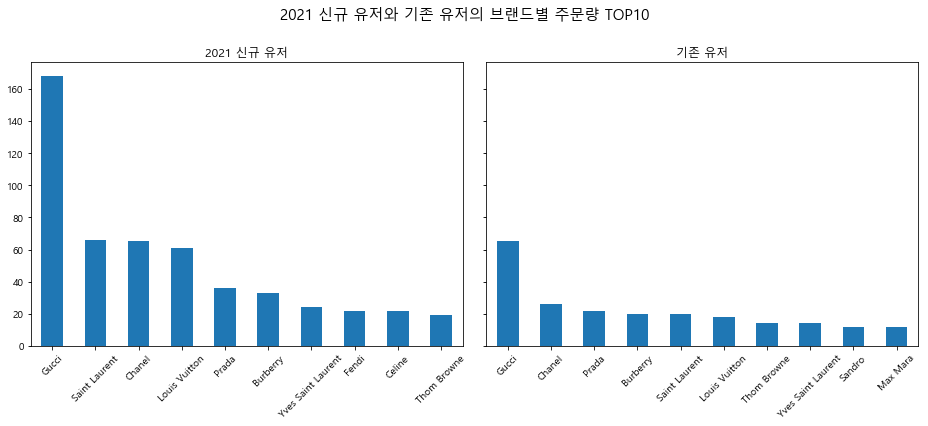

In [226]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(13,6), sharey=True)
fig.suptitle('2021 Ïã†Í∑ú Ïú†Ï†ÄÏôÄ Í∏∞Ï°¥ Ïú†Ï†ÄÏùò Î∏åÎûúÎìúÎ≥Ñ Ï£ºÎ¨∏Îüâ TOP10', fontsize=15)
df.query('seg_new==1').brandnm.value_counts().head(10).plot.bar(rot=45, title='2021 Ïã†Í∑ú Ïú†Ï†Ä', ax=axes[0])
df.query('seg_new==0').brandnm.value_counts().head(10).plot.bar(rot=45, title='Í∏∞Ï°¥ Ïú†Ï†Ä', ax=axes[1])

fig.tight_layout()
fig.subplots_adjust(top=0.85)

In [227]:
# Î∏åÎûúÎìúÏùò Í≤ΩÏö∞ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Îü≠ÏÖîÎ¶¨ Î∏åÎûúÎìúÎ•º ÏÑ†Ìò∏ÌïòÎäî Î™®ÏäµÏù¥Îã§.
# Í∏∞Ï°¥ Ïú†Ï†ÄÎäî Íµ¨Ï∞å Ïù¥Ïô∏Ïùò Îã§Î•∏ Î∏åÎûúÎìúÏóê ÎåÄÏã† ÏÑ†Ìò∏ÎèÑÍ∞Ä ÌÅ¨Í≤å ÏóÜÏßÄÎßå,
# Ïã†Í∑ú Ïú†Ï†ÄÏùò Í≤ΩÏö∞ ÏÉùÎ°úÎûë, Î£®Ïù¥ÎπÑÌÜµ, ÏÉ§ÎÑ¨Ïùò Íµ¨Îß§ ÎπÑÏ§ëÏù¥ ÎäòÏñ¥ÎÇ¨Îã§.

In [228]:
print('Ïã†Í∑ú Ïú†Ï†ÄÏùò Íµ¨Ï∞å Íµ¨Îß§ ÎπÑÏú®ÏùÄ',round(df.query("seg_new == 1 and brandnm == 'Gucci'").shape[0]/df.query("seg_new == 1").shape[0] * 100,2), 'Ïù¥Îã§.')
print('Í∏∞Ï°¥ Ïú†Ï†ÄÏùò Íµ¨Ï∞å Íµ¨Îß§ ÎπÑÏú®ÏùÄ',round(df.query("seg_new == 0 and brandnm == 'Gucci'").shape[0]/df.query("seg_new == 0").shape[0] * 100,2), 'Ïù¥Îã§.')

Ïã†Í∑ú Ïú†Ï†ÄÏùò Íµ¨Ï∞å Íµ¨Îß§ ÎπÑÏú®ÏùÄ 17.04 Ïù¥Îã§.
Í∏∞Ï°¥ Ïú†Ï†ÄÏùò Íµ¨Ï∞å Íµ¨Îß§ ÎπÑÏú®ÏùÄ 13.4 Ïù¥Îã§.


In [229]:
print('Ïã†Í∑ú Ïú†Ï†ÄÏùò ÏÑ†Ìò∏ Î∏åÎûúÎìú 2ÏàúÏúÑÏùò Íµ¨Îß§ ÎπÑÏú®ÏùÄ',round(df.query("seg_new == 1 and brandnm == 'Saint Laurent'").shape[0]/df.query("seg_new == 1").shape[0] * 100,2), 'Ïù¥Îã§.')
print('Í∏∞Ï°¥ Ïú†Ï†ÄÏùò ÏÑ†Ìò∏ Î∏åÎûúÎìú 2ÏàúÏúÑÏùò Íµ¨Îß§ ÎπÑÏú®ÏùÄ',round(df.query("seg_new == 0 and brandnm == 'Chanel'").shape[0]/df.query("seg_new == 0").shape[0] * 100,2), 'Ïù¥Îã§.')

Ïã†Í∑ú Ïú†Ï†ÄÏùò ÏÑ†Ìò∏ Î∏åÎûúÎìú 2ÏàúÏúÑÏùò Íµ¨Îß§ ÎπÑÏú®ÏùÄ 6.69 Ïù¥Îã§.
Í∏∞Ï°¥ Ïú†Ï†ÄÏùò ÏÑ†Ìò∏ Î∏åÎûúÎìú 2ÏàúÏúÑÏùò Íµ¨Îß§ ÎπÑÏú®ÏùÄ 5.36 Ïù¥Îã§.


<br>

3. Ïã†Í∑ú Ïú†Ï†ÄÎì§Ïùò ÏÑ†Ìò∏ÎèÑÍ∞Ä ÎÜíÏùÄ Î∏åÎûúÎìúÎì§ÏùÄ "Í∞ÄÎ∞©" Ï§ëÏã¨Ïùò Î∏åÎûúÎìúÎùºÍ≥† ÏÉùÍ∞ÅÎêúÎã§.

Í∑∏Îüº Ïã†Í∑ú Ïú†Ï†Ä ÏÑ†Ìò∏ÎèÑ ÏÉÅÏúÑ Î∏åÎûúÎìúÎì§Ïùò Í∞ÄÎ∞© ÌåêÎß§ ÎπÑÏ§ëÏùÄ?

In [230]:
brand_bag_per = {'brand' :
                ['Gucci', 'Saint Laurent', 'Chanel', 'Louis Vuitton'],
                'bag_per' :
                [round(df[(df["brandnm"] == "Gucci") & (df["sub_type"] == "BA") & (df["seg_new"] == 1)].shape[0] / df[(df["brandnm"] == "Gucci")  & (df["seg_new"] == 1)].shape[0] * 100, 2),
                round(df[(df["brandnm"] == "Saint Laurent") & (df["sub_type"] == "BA") & (df["seg_new"] == 1)].shape[0] / df[(df["brandnm"] == "Saint Laurent")  & (df["seg_new"] == 1)].shape[0] * 100, 2),
                round(df[(df["brandnm"] == "Chanel") & (df["sub_type"] == "BA") & (df["seg_new"] == 1)].shape[0] / df[(df["brandnm"] == "Chanel")  & (df["seg_new"] == 1)].shape[0] * 100, 2),
                round(df[(df["brandnm"] == "Louis Vuitton") & (df["sub_type"] == "BA") & (df["seg_new"] == 1)].shape[0] / df[(df["brandnm"] == "Louis Vuitton")  & (df["seg_new"] == 1)].shape[0] * 100, 2)]}

seg_new_brand_bag = pd.DataFrame(brand_bag_per)

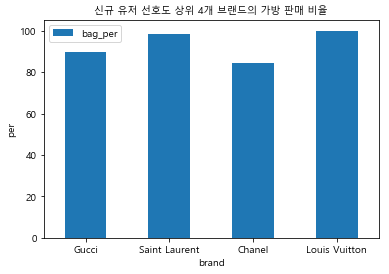

In [231]:
seg_new_brand_bag.plot(kind = 'bar', x = 'brand', rot = 0)
plt.ylabel('per')
plt.title('Ïã†Í∑ú Ïú†Ï†Ä ÏÑ†Ìò∏ÎèÑ ÏÉÅÏúÑ 4Í∞ú Î∏åÎûúÎìúÏùò Í∞ÄÎ∞© ÌåêÎß§ ÎπÑÏú®', fontsize = 10);

In [232]:
seg_new_brand_bag

brand  bag_per
0          Gucci    89.88
1  Saint Laurent    98.48
2         Chanel    84.62
3  Louis Vuitton   100.00

In [233]:
print('Ïã†Í∑ú Ïú†Ï†ÄÏùò Ï†ÑÏ≤¥ Ï§ë Í∞ÄÎ∞© Íµ¨Îß§ ÎπÑÏú®ÏùÄ',round(df.query("seg_new == 1 and sub_type == 'BA'").shape[0]/df.query("seg_new == 1").shape[0] * 100,2), 'Ïù¥Îã§.')
print('Í∏∞Ï°¥ Ïú†Ï†ÄÏùò Ï†ÑÏ≤¥ Ï§ë Í∞ÄÎ∞© Íµ¨Îß§ ÎπÑÏú®ÏùÄ',round(df.query("seg_new == 0 and sub_type == 'BA'").shape[0]/df.query("seg_new == 0").shape[0] * 100,2), 'Ïù¥Îã§.')

Ïã†Í∑ú Ïú†Ï†ÄÏùò Ï†ÑÏ≤¥ Ï§ë Í∞ÄÎ∞© Íµ¨Îß§ ÎπÑÏú®ÏùÄ 51.22 Ïù¥Îã§.
Í∏∞Ï°¥ Ïú†Ï†ÄÏùò Ï†ÑÏ≤¥ Ï§ë Í∞ÄÎ∞© Íµ¨Îß§ ÎπÑÏú®ÏùÄ 38.56 Ïù¥Îã§.


In [234]:
# Ïã†Í∑ú Ïú†Ï†ÄÏùò Í≤ΩÏö∞ ÏÉÅÏúÑ 4Í∞ú Î∏åÎûúÎìú(Íµ¨Ï∞å, ÏÉùÎ°úÎûë, Ï±ÑÎÑê, Î£®Ïù¥ÎπÑÌÜµ)Ïóê ÎåÄÌï¥ÏÑú Í∞ÄÎ∞© Íµ¨Îß§ ÎπÑÏú®Ïù¥ ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎÜíÏïòÎã§.
# ÏúÑ Î∏åÎûúÎìúÏóêÏÑú Í∞ÄÎ∞©ÏùÑ Î†åÌä∏ÌïòÎäî ÎπÑÏ§ëÏù¥ Ï†ÑÏ≤¥ ÏïΩ 93%
# Ï†ÑÏ≤¥ Î†åÌä∏ Í±¥Ïàò Ï§ë Í∞ÄÎ∞©ÏùÑ ÎπåÎ¶¨Îäî ÎπÑÏú®ÏùÄ 50% Ï†ïÎèÑÏù∏Í±∏ Í∞êÏïàÌïòÎ©¥.. ÏóÑÏ≤≠ ÎÜíÎã§.
# Ïù¥Î†áÍ≤å Î≥¥Îãà ÌôïÏã§ÌïòÍ≤å Î™ÖÌíàÎ∞±Ïóê ÎåÄÌïú ÏàòÏöîÍ∞Ä Ïª§ÏßÄÎäîÍ≤å Î≥¥Ïù∏Îã§.
# Î™ÖÌíàÎ∞±Ïóê ÎåÄÌïú ÏàòÏöîÍ∞Ä ÎäòÏñ¥ÎÇòÍ≥† ÏûàÏúºÎãà Í≥µÍ∏âÏ±Ö(ÏÖ∞Ïñ¥Îü¨)ÏùÑ Ï∞æÎäî Î∞©Î≤ïÏùÑ ÏÉùÍ∞ÅÌï¥Î≥¥ÏïÑÏïºÍ≤†Îã§.

In [235]:
# Ïù¥ÏôÄ Í¥ÄÎ†®Îêú Ï∂îÍ∞ÄÎ°ú

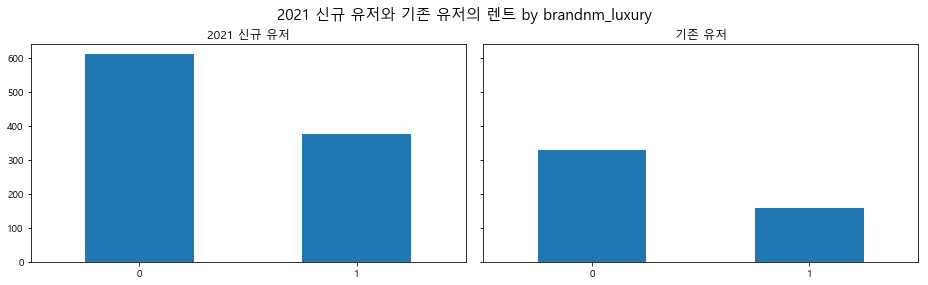

In [236]:
# Ï†ÑÏ≤¥ ÏÉÅÌíà Î†åÌä∏ Ï§ëÏóê Îü≠ÏÖîÎ¶¨ Ïñë
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(13,4), sharey=True)
fig.suptitle('2021 Ïã†Í∑ú Ïú†Ï†ÄÏôÄ Í∏∞Ï°¥ Ïú†Ï†ÄÏùò Î†åÌä∏ by brandnm_luxury', fontsize=15)
df.query('seg_new == 1').brandnm_luxury.value_counts().plot.bar(rot=0, title='2021 Ïã†Í∑ú Ïú†Ï†Ä', ax=axes[0])
df.query('seg_new == 0').brandnm_luxury.value_counts().plot.bar(rot=0, title='Í∏∞Ï°¥ Ïú†Ï†Ä', ax=axes[1])

fig.tight_layout()
fig.subplots_adjust(top=0.85)

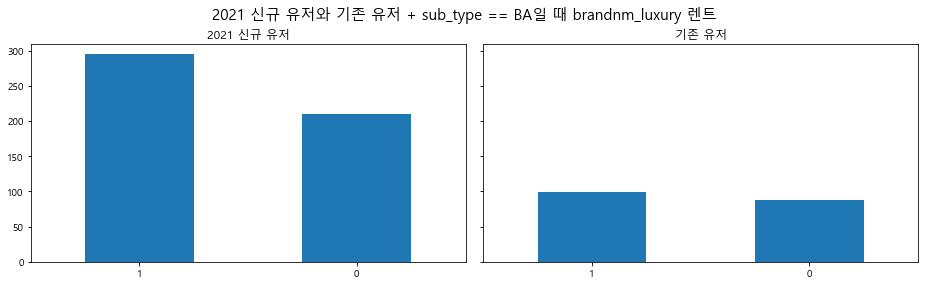

In [237]:
# ÎπΩ Î†åÌä∏ Ï§ëÏóê Îü≠ÏÖîÎ¶¨ Ïñë
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(13,4), sharey=True)
fig.suptitle('2021 Ïã†Í∑ú Ïú†Ï†ÄÏôÄ Í∏∞Ï°¥ Ïú†Ï†Ä + sub_type == BAÏùº Îïå brandnm_luxury Î†åÌä∏', fontsize=15)
df.query('seg_new == 1 and sub_type == "BA"').brandnm_luxury.value_counts().plot.bar(rot=0, title='2021 Ïã†Í∑ú Ïú†Ï†Ä', ax=axes[0])
df.query('seg_new == 0 and sub_type == "BA"').brandnm_luxury.value_counts().plot.bar(rot=0, title='Í∏∞Ï°¥ Ïú†Ï†Ä', ax=axes[1])

fig.tight_layout()
fig.subplots_adjust(top=0.85)

In [238]:
# Ï†ÑÏ≤¥ ÏÉÅÌíàÏùò Î†åÌä∏ÎüâÏùÑ brandnm_luxuryÎ°ú ÎÇòÎà†Î≥¥ÏïòÏùÑ ÎïåÎäî Î™ÖÌíàÏóê ÏÜçÌïòÏßÄ ÏïäÏùÄ ÏÉÅÌíàÏùÑ Îçî ÎßéÏù¥ Ï∞æÎäî Î™®ÏäµÏù¥Îã§.
# ÎπΩ Íµ¨Îß§ Ïú†Ï†ÄÎ°ú filterÎ•º ÎÑ£ÏúºÎ©¥, Î™ÖÌíà Î†åÌä∏ÎüâÏù¥ Îçî ÎßéÏïÑÏßÄÎäî Î™®Ïäµ. ÌäπÌûà Ïã†Í∑úÏú†Ï†Ä!
top_brandnm_list = list(df.query('seg_new == 1').groupby('brandnm')['user'].count().sort_values(ascending=False).head(10).index)


In [239]:
top_brandnm_list

['Gucci',
 'Saint Laurent',
 'Chanel',
 'Louis Vuitton',
 'Prada',
 'Burberry',
 'Yves Saint Laurent',
 'Fendi',
 'Celine',
 'Thom Browne']

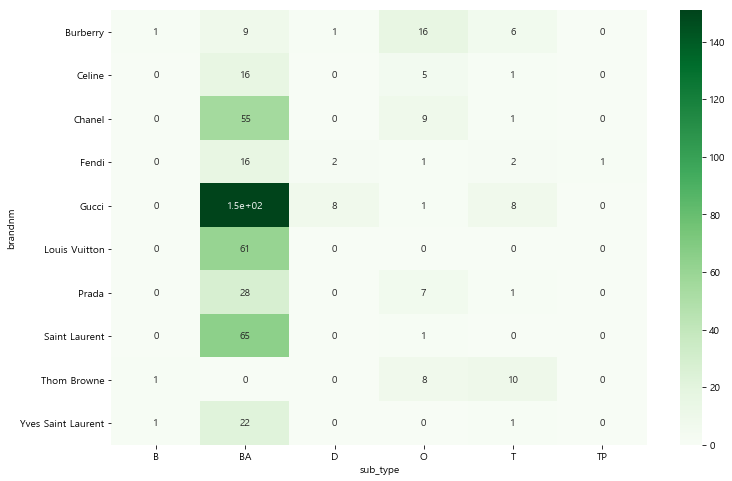

In [240]:
# Ïû¨ÌôòÎãò ÏΩîÎìúÎ•º Îî∞ÏôÄÏÑú crosstabÏùÑ Í∑∏Î†§Î≥¥Î©¥ Îã§ÏùåÍ≥º Í∞ôÎã§ WoW
# Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Î≥¥ÏïòÏùÑ ÎïåÎäî Í∑∏ÎûòÎèÑ ÏïÑÏö∞ÌÑ∞ÎÇò ÏÉÅÏùòÏ™ΩÏúºÎ°ú Í∞íÏù¥ ÏûàÎäî Ìé∏Ïù¥ÏóàÎäîÎç∞, 
# 2021ÎÖÑ Ïã†Í∑ú Ïú†Ï†ÄÏùò Î†åÌä∏ ÏÑ±Ìñ•ÏóêÏÑúÎäî bag + luxury Î∏åÎûúÎìúÏùò Ï°∞Ìï©Ïóê ÏôÑÏ†Ñ ÏßëÏ§ëÎêú Î™®Ïäµ.

plt.figure(figsize = (12,8))
sns.heatmap(
pd.crosstab(index = df.query(f"brandnm == {top_brandnm_list} and seg_new == 1")['brandnm'], columns = df.query(f"brandnm == {top_brandnm_list} and seg_new == 1")['sub_type']),
cmap = 'Greens', annot=True);

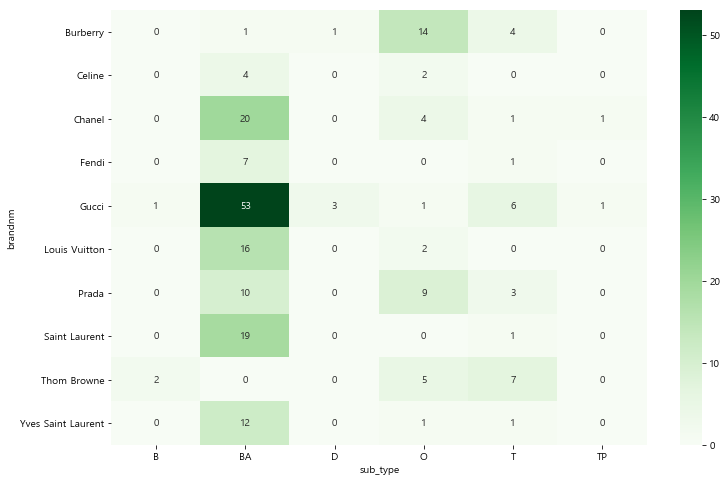

In [241]:
plt.figure(figsize = (12,8))
sns.heatmap(
pd.crosstab(index = df.query(f"brandnm == {top_brandnm_list} and seg_new == 0")['brandnm'], columns = df.query(f"brandnm == {top_brandnm_list} and seg_new == 0")['sub_type']),
cmap = 'Greens', annot=True);

<br>

4. app_yn Î≥ÄÏàòÏôÄ Î™ÖÌíàÎ∞± Î†åÌä∏ Ïã†Í∑úÏú†Ï†Ä 

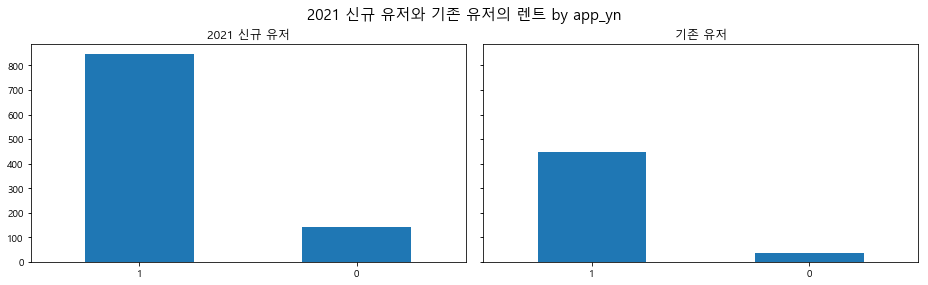

In [242]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(13,4), sharey=True)
fig.suptitle('2021 Ïã†Í∑ú Ïú†Ï†ÄÏôÄ Í∏∞Ï°¥ Ïú†Ï†ÄÏùò Î†åÌä∏ by app_yn', fontsize=15)
df.query('seg_new == 1').app_yn.value_counts().plot.bar(rot=0, title='2021 Ïã†Í∑ú Ïú†Ï†Ä', ax=axes[0])
df.query('seg_new == 0').app_yn.value_counts().plot.bar(rot=0, title='Í∏∞Ï°¥ Ïú†Ï†Ä', ax=axes[1])

fig.tight_layout()
fig.subplots_adjust(top=0.85)

In [243]:
# Î®ºÏ†Ä Ï†ÑÏ≤¥ Ïï± ÏÇ¨Ïö©ÎüâÏóêÏÑú Ïã†Í∑úÏú†Ï†ÄÏôÄ Í∏∞Ï°¥Ïú†Ï†Ä Î™®Îëê Ïï± ÏÇ¨Ïö©ÎüâÏù¥ ÎßéÎã§. ÏÉÅÎåÄÏ†ÅÏù∏ ÎπÑÏú®ÏùÄ ÎπÑÏä∑

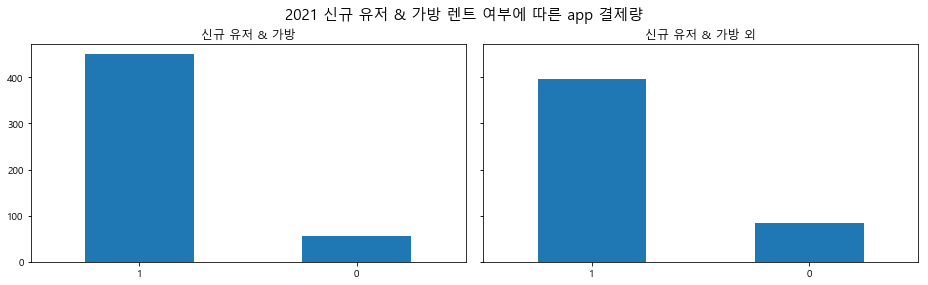

In [244]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(13,4), sharey=True)
fig.suptitle('2021 Ïã†Í∑ú Ïú†Ï†Ä & Í∞ÄÎ∞© Î†åÌä∏ Ïó¨Î∂ÄÏóê Îî∞Î•∏ app Í≤∞Ï†úÎüâ', fontsize=15)
df.query('seg_new == 1 and sub_type == "BA"').app_yn.value_counts().plot.bar(rot=0, title='Ïã†Í∑ú Ïú†Ï†Ä & Í∞ÄÎ∞©', ax=axes[0])
df.query('seg_new == 1 and sub_type != "BA"').app_yn.value_counts().plot.bar(rot=0, title='Ïã†Í∑ú Ïú†Ï†Ä & Í∞ÄÎ∞© Ïô∏', ax=axes[1])

fig.tight_layout()
fig.subplots_adjust(top=0.85)

In [245]:
# ÏúÑÏóêÏÑú ÏÇ¥Ìé¥Î≥¥ÏïòÎìØÏù¥ Ïã†Í∑ú Ïú†Ï†ÄÏùò 51%Îäî Í∞ÄÎ∞©ÏùÑ Î†åÌä∏ÌïòÎäî Í≤ÉÏù¥ Î™©Ï†ÅÏù¥Îã§.
# Í∞ÄÎ∞©ÏùÑ Î†åÌä∏ÌïòÎäî Í≤ÉÏù¥ Î™©Ï†ÅÏù∏ Ïú†Ï†ÄÎì§ÏóêÍ≤åÏÑú Ïï±ÏùÑ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Îçî ÎßéÏù¥ Ïù¥Ïö©ÌïòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
# ÎßåÏïΩ Ïú†Ï†Ä ÌñâÎèô Î°úÍ∑∏Í∞Ä ÏûàÍ≥† Ïï±ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Ïú†Ï†ÄÏùò Íµ¨Îß§ Ï†ÑÌôòÏú®Ïù¥ ÎÜíÎã§Îäî Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎã§Î©¥, 
# Ïú†Ï†ÄÏùò ÏáºÌïë Í≥µÍ∞ÑÏùÑ Ïï± Ï™ΩÏúºÎ°ú ÏµúÎåÄÌïú Î∞ÄÏñ¥ÎÜìÎäî Ï†ÑÎûµÎèÑ ÏÉùÍ∞ÅÌï¥Î≥º Ïàò ÏûàÍ≤†Îã§.
# ex) Î¨¥Ïã†ÏÇ¨. Ìë∏Ïãú ÏïåÎ¶ºÏùÑ Ïï±ÏóêÏÑúÎßå Ï†úÍ≥µÎêòÎèÑÎ°ù Î∞îÍøà

<br>

5. p_typeÍ≥º Î™ÖÌíàÎ∞± Î†åÌä∏ Ïã†Í∑úÏú†Ï†Ä

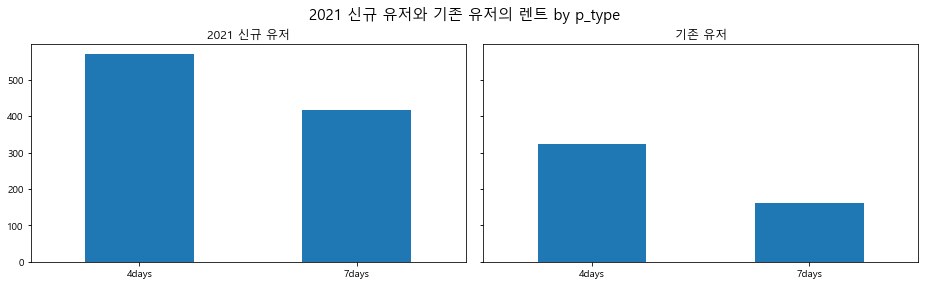

In [246]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(13,4), sharey=True)
fig.suptitle('2021 Ïã†Í∑ú Ïú†Ï†ÄÏôÄ Í∏∞Ï°¥ Ïú†Ï†ÄÏùò Î†åÌä∏ by p_type', fontsize=15)
df.query('seg_new == 1').p_type.value_counts().plot.bar(rot=0, title='2021 Ïã†Í∑ú Ïú†Ï†Ä', ax=axes[0])
df.query('seg_new == 0').p_type.value_counts().plot.bar(rot=0, title='Í∏∞Ï°¥ Ïú†Ï†Ä', ax=axes[1])

fig.tight_layout()
fig.subplots_adjust(top=0.85)

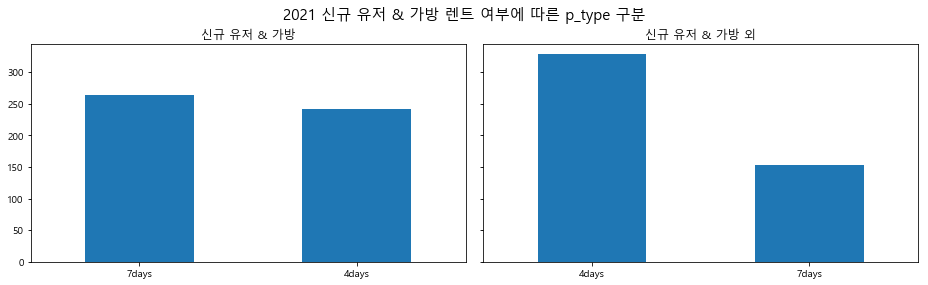

In [247]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(13,4), sharey=True)
fig.suptitle('2021 Ïã†Í∑ú Ïú†Ï†Ä & Í∞ÄÎ∞© Î†åÌä∏ Ïó¨Î∂ÄÏóê Îî∞Î•∏ p_type Íµ¨Î∂Ñ', fontsize=15)
df.query('seg_new == 1 and sub_type == "BA"').p_type.value_counts().plot.bar(rot=0, title='Ïã†Í∑ú Ïú†Ï†Ä & Í∞ÄÎ∞©', ax=axes[0])
df.query('seg_new == 1 and sub_type != "BA"').p_type.value_counts().plot.bar(rot=0, title='Ïã†Í∑ú Ïú†Ï†Ä & Í∞ÄÎ∞© Ïô∏', ax=axes[1])

fig.tight_layout()
fig.subplots_adjust(top=0.85)

In [248]:
# Î™ÖÌíàÎ∞±ÏùÑ Íµ¨Îß§ÌïòÎäî Ïã†Í∑ú Ïú†Ï†ÄÍ∞Ä Í∑∏Î†áÏßÄ ÏïäÏùÄ Ïú†Ï†ÄÎ≥¥Îã§ 7Ïùº Î†åÌä∏ ÎπÑÏ§ëÏù¥ ÎÜíÏßÄÎßå, Í∑∏Î†áÍ≤å ÌÅ∞ Ï∞®Ïù¥Îäî ÎäêÎÅºÏßÄ Î™ªÌïúÎã§.
# ÏùòÎ•òÎäî Í≤∞ÌòºÏãù, ÌñâÏÇ¨, Î©¥Ï†ë Îì± Îî± ÌïòÎ£®Î•º ÏúÑÌï¥ ÎπåÎ¶¨Í∏∞ ÎïåÎ¨∏Ïóê ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Í∏∞Í∞ÑÏù¥ Ï†ÅÍ≥† Í∞íÏù¥ Ïãº 4Ïùº Î†åÌä∏Î•º Îçî ÎßéÏù¥ Ïù¥Ïö©ÌïòÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.
# Î™ÖÌíàÎ∞± 7Ïùº Í∏∞Í∞ÑÏù¥ ÎÜíÏùÄ Ïù¥Ïú†Îäî Ï†ïÌôïÌïòÍ≤å Î™®Î•¥Í≤†Îã§. Ïó¨ÌñâÍ∞à Îïå Îì§Í∏∞ ÏúÑÌï¥ÏÑú? Í∑ºÎç∞ Ïù¥ÏãúÍµ≠Ïóê?

<br>

6. Ïã†Í∑ú Ìó§ÎπÑ or Ïã†Í∑ú 1Ìöå Ïú†Ï†ÄÏùò Ï∞®Ïù¥Îäî?

In [249]:
print('Ïã†Í∑ú Ìó§ÎπÑ Ïú†Ï†ÄÎäî Ï¥ù', df.query('seg_new == 1 and seg_heavy == 1').shape[0], 'Î™Ö ÏûÖÎãàÎã§.')
print('Ïã†Í∑ú 1Ìöå Ïú†Ï†ÄÎäî Ï¥ù', df.query('seg_new == 1 and seg_heavy == 0').shape[0], 'Î™Ö ÏûÖÎãàÎã§.')

Ïã†Í∑ú Ìó§ÎπÑ Ïú†Ï†ÄÎäî Ï¥ù 233 Î™Ö ÏûÖÎãàÎã§.
Ïã†Í∑ú 1Ìöå Ïú†Ï†ÄÎäî Ï¥ù 753 Î™Ö ÏûÖÎãàÎã§.


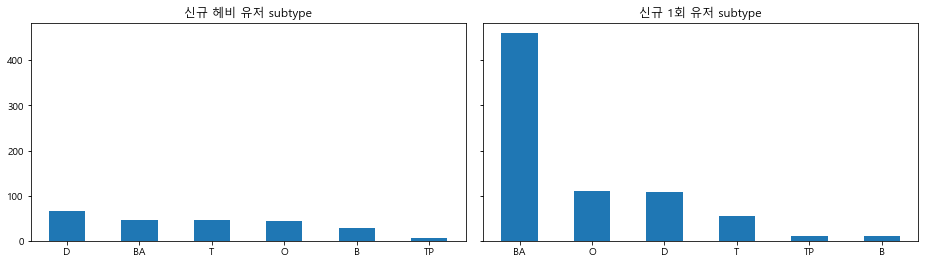

In [250]:
# 
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(13,4), sharey=True)
df.query('seg_new == 1 and seg_heavy == 1').sub_type.value_counts().plot.bar(rot=0, title='Ïã†Í∑ú Ìó§ÎπÑ Ïú†Ï†Ä subtype', ax=axes[0])
df.query('seg_new == 1 and seg_heavy == 0').sub_type.value_counts().plot.bar(rot=0, title='Ïã†Í∑ú 1Ìöå Ïú†Ï†Ä subtype', ax=axes[1])

fig.tight_layout()
fig.subplots_adjust(top=0.85)

In [251]:
pd.DataFrame(df.query('seg_new == 1 and seg_heavy == 1').groupby('user_id')['sub_type'].value_counts()).head(20)

sub_type
user_id sub_type          
1140758 B                2
        O                2
        T                1
1140859 B                1
        O                1
        T                1
1140937 D                2
1141009 BA               1
        O                1
        TP               1
1141367 D                2
1141520 T                2
        D                1
1141925 BA               1
        O                1
1142677 T                8
        B                1
1142679 O                2
        BA               1
        T                1

In [252]:
# Ïã†Í∑ú Ìó§ÎπÑ Ïú†Ï†ÄÎäî Î™ÖÌíàÎ∞±Ïóê ÏßëÏ§ëÎêòÏßÄ ÏïäÍ≥†, Î∞± + ÏïÑÏö∞ÌÑ∞(BA + O)Ï≤òÎüº Î≠îÍ∞Ä Ï°∞Ìï©ÏùÑ ÏßúÏÑú Íµ¨Îß§ÌïòÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.
# Ïù¥ÏôÄÏ§ëÏóê TÎßå ÌïúÎ≤àÏóê 8Î≤å ÎπåÎ¶¨Îäî Í≤ΩÏö∞ÎèÑ ÏûàÎäîÎç∞, Ïä§ÌÉÄÏùºÎ¶¨Ïä§Ìä∏Ïù∏Í∞Ä? ÌòÑÏßÅ Ïä§ÌÉÄÏùºÎ¶¨Ïä§Ìä∏Îì§Ïù¥ Ï£º Í≥†Í∞ùÍµ∞Ïóê ÏûàÎÇò?

## üìÉ Ï†ïÎ¶¨

1. ÏöîÏùºÎ≥Ñ Î†åÌä∏ÎüâÏùÑ Î≥¥ÏïòÏùÑ Îïå, Ï£ºÏ§ë ÌäπÌûà ÌôîÏàòÎ™©Ïóê Î†åÌä∏ Í±¥ÏàòÍ∞Ä ÎßéÏïòÎäîÎç∞, Í∑∏ Ïù¥Ïú†Îäî Í∏àÌÜ†ÏùºÏóê ÏÉÅÌíàÏùÑ ÏûÖÍ∏∞ ÏúÑÌï¥ÏÑúÏùº Í≤ÉÏù¥Îã§.

2. Í∞ÄÏûÖ ÌõÑ 1Ïùº Ïù¥ÎÇ¥ Ï≤´ Íµ¨Îß§Í≥†Í∞ùÏùò Ï¶ùÍ∞ÄÏú®ÏùÄ 2ÏõîÏóê Ï†ÑÏõî ÎåÄÎπÑ 100%Í∞Ä Ï¶ùÍ∞ÄÌñàÎäîÎç∞, ÌñâÏÇ¨Î•º ÏßÑÌñâÌñàÍ∏∞ ÎïåÎ¨∏ÏúºÎ°ú Î≥¥Ïù∏Îã§. (Ï∞¨ÏÑúÎãò ÏΩîÎìúÏóê ÏßÄÏù∏Îãò ÏΩîÎ©òÌä∏)

3. 2021ÎÖÑ Í∞ÄÏûÖÌïú `Ïã†Í∑ú Ïú†Ï†Ä`ÏôÄ Ïù¥Ï†ÑÏóê Í∞ÄÏûÖÌïú `Í∏∞Ï°¥ Ïú†Ï†Ä`Î°ú ÎÇòÎàÑÏñ¥ Î≥¥ÏïòÏùÑ Îïå
    
    - Íµ¨Ï∞åÎäî ÏõêÎûò ÎßéÏù¥ Î†åÌä∏ÌïúÎã§.
    - Î∏åÎûúÎìúÏùò Í≤ΩÏö∞ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Îü≠ÏÖîÎ¶¨ Î∏åÎûúÎìúÎ•º ÏÑ†Ìò∏ÌïòÎäî Î™®ÏäµÏù¥Îã§.<br>
        Í∏∞Ï°¥ Ïú†Ï†ÄÎäî Íµ¨Ï∞å Ïù¥Ïô∏Ïùò Îã§Î•∏ Î∏åÎûúÎìúÏóê ÎåÄÏã† ÏÑ†Ìò∏ÎèÑÍ∞Ä ÌÅ¨Í≤å ÏóÜÏßÄÎßå, Ïã†Í∑ú Ïú†Ï†ÄÏùò Í≤ΩÏö∞ ÏÉùÎ°úÎûë, Î£®Ïù¥ÎπÑÌÜµ, ÏÉ§ÎÑ¨Ïùò Íµ¨Îß§ ÎπÑÏ§ëÏù¥ ÎäòÏñ¥ÎÇ¨Îã§.
    - Îëê Í∑∏Î£π Î™®Îëê Í∞ÄÎ∞©ÏùÑ ÎßéÏù¥ Íµ¨Îß§ÌñàÏßÄÎßå, ÎπÑÏú®ÏùÑ Î≥¥ÏïòÏùÑ Îïê, Ïã†Í∑ú Ïú†Ï†ÄÍ∞Ä Í∞ÄÎ∞©ÏùÑ Íµ¨Îß§Ìïú ÎπÑÏ§ëÏù¥ Îçî ÎÜíÎã§.
    - Ïã†Í∑ú Ïú†Ï†ÄÏùò Í≤ΩÏö∞ ÏÉÅÏúÑ 4Í∞ú Î∏åÎûúÎìú(Íµ¨Ï∞å, ÏÉùÎ°úÎûë, Ï±ÑÎÑê, Î£®Ïù¥ÎπÑÌÜµ)Ïóê ÎåÄÌï¥ÏÑú Í∞ÄÎ∞© Íµ¨Îß§ ÎπÑÏú®Ïù¥ ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎÜíÏïòÎã§. ÏïΩ 93%
    - Ïã†Í∑ú Ïú†Ï†ÄÏùò Ïï±/Ïõπ Ïù¥Ïö©Î•†ÏùÄ Í∏∞Ï°¥ Ïú†Ï†ÄÏùò Ïù¥Ïö©Î•†Í≥º ÎπÑÏä∑ÌïòÎÇò, Î™ÖÌíàÎ∞±ÏùÑ Ï∞æÎäî Ïã†Í∑ú Ïú†Ï†ÄÏóê ÎåÄÌï¥ÏÑúÎäî Ïï±ÏúºÎ°ú Íµ¨Îß§Ìïú Í≤ΩÏö∞Í∞Ä Îçî ÎßéÏïÑÏßÑÎã§.
    - Ïã†Í∑ú Ïú†Ï†ÄÏôÄ Í∏∞Ï°¥ Ïú†Ï†ÄÏùò p_typeÏóê ÎåÄÌï¥ÏÑ† ÌÅ∞ Ï∞®Ïù¥Î•º ÎäêÎÅºÏßÄ Î™ªÌñàÎã§.


## ‚úèÔ∏è ÎπÑÏ¶àÎãàÏä§Ï†ÅÏúºÎ°ú ÏÉùÍ∞ÅÌï†ÎßåÌïú Î∂ÄÎ∂Ñ

- Ïã†Í∑ú Ïú†Ï†ÄÎäî Î™ÖÌíàÎ∞±ÏùÑ ÏúÑÌï¥ ÎèàÏùÑ ÏßÄÎ∂àÌïúÎã§. Î™ÖÌíàÎ∞± Í≥µÍ∏âÎßùÏùÑ ÎäòÎ†§ÏïºÌïúÎã§.
- **Î™ÖÌíàÎ∞± Ï§ëÏã¨ÏúºÎ°ú** Ìë∏Ïãú ÏïåÎ¶ºÏùÑ ÎïåÎ¶∞Îã§.<br>
    ex) Î£®Ïù¥ÎπÑÌÜµ Î∞± Ïã†Í∑ú 5Ï¢Ö Í≤ÄÏàò ÏôÑÎ£å. Ïù¥Î≤à Ï£ºÎßê ÎÇòÎì§Ïù¥Ïóê Îì§Í≥†Í∞ÄÍ∏∞ Îî± Ï¢ãÏïÑÏöî!
- **Ïú†Ï†Ä ÌñâÎèô Î°úÍ∑∏Í∞Ä ÏûàÍ≥† Ïï±ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Ïú†Ï†ÄÏùò Íµ¨Îß§ Ï†ÑÌôòÏú®Ïù¥ ÎÜíÎã§Îäî Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎã§Î©¥**, Ïú†Ï†ÄÏùò ÏáºÌïë Í≥µÍ∞ÑÏùÑ Ïï± Ï™ΩÏúºÎ°ú ÏµúÎåÄÌïú Î∞ÄÏñ¥ÎÜìÎäî Ï†ÑÎûµÎèÑ ÏÉùÍ∞ÅÌï¥Î≥º Ïàò ÏûàÍ≤†Îã§.<br>
    ex) Î¨¥Ïã†ÏÇ¨ : Ìë∏Ïãú ÏïåÎ¶ºÏùÑ Ïï±ÏóêÏÑúÎßå Ï†úÍ≥µÎ∞õÏùÑ Ïàò ÏûàÎèÑÎ°ù ÏÑúÎπÑÏä§Î•º Î∞îÍøà


#### ÌïúÍ≥Ñ
5.18 ÌöåÏùò Îïå Ï∞¨ÏÑúÎãòÏù¥ ÎßêÌï¥Ï£ºÏã† Í≤ÉÏ≤òÎüº ÏÉàÎ°ú Ï¶ùÍ∞ÄÌïú Î∏åÎûúÎìúÎì§Ïóê ÎåÄÌï¥ÏÑúÎäî Ìä∏Î†åÎìúÍ∞Ä Î∞îÎÄê Í≤ÉÏù∏ÏßÄ, ÏïÑÎãàÎ©¥ Ïù¥Ï†ÑÏóêÎäî ÏóÜÎçò Ï†úÌíàÏù¥ 2021ÎÖÑ Îì§Ïñ¥ ÏÉùÍ∏∞Î©¥ÏÑú Íµ¨Îß§Í∞Ä ÎßéÏïÑÏßÑ Í±¥ÏßÄÎäî Ï†ïÌôïÌïòÍ≤å Ïïå Ïàò ÏóÜÎã§. ÏòàÎ•º Îì§Î©¥ ÎèôÏÑ≠Îãò ÏΩîÎìúÏóêÏÑú Î∏åÎûúÎìú ÏÖÄÎ¶∞ÎäêÏùò Î†åÌä∏Îäî 2021ÎÖÑ Ïù¥Ï†Ñ 0Í±¥Ïù¥ÏóàÎäîÎç∞, Ïù¥ÌõÑÏóêÎäî ÎßéÏïÑÏ°åÏúºÎØÄÎ°ú ÏÖÄÎ¶∞ÎäêÎäî 2021ÎÖÑ Ìä∏Î†åÎìúÍ∞Ä ÎêêÎã§Í≥† ÌôïÏ†ïÌï† Ïàò ÏóÜÎã§. 2021ÎÖÑ 1ÏõîÏóê ÏÖÄÎ¶∞Îäê Ï†úÌíàÏù¥ ÏóÖÎ°úÎìúÎêú Í±∞ÎùºÎ©¥ Ìä∏Î†åÎìúÍ∞Ä Î∞îÍºàÎã§Í≥† ÎßêÌï† Ïàò ÏûàÏùÑÍπå??

ÌïòÎÇò ÌôïÏã§Ìïú Í±¥ 2021ÎÖÑ Ïã†Í∑úÏú†Ï†ÄÏùò Íµ¨Îß§Î†•Ïù¥ ÏÉÅÏäπÌñàÎã§Îäî Ï†êÏù¥Îã§. ÎßàÏºÄÌåÖ ÎïåÎ¨∏Ïù¥Îì† ÏïÑÎãàÎ©¥ ÏûÖÏÜåÎ¨∏ ÎïåÎ¨∏Ïù¥Îì†..



In [253]:
# Ïù¥ÌõÑ ÏßÑÌñâ
# ÌïÑÏàò : 2021 Ïã†Í∑ú/ Í∏∞Ï°¥ Í≥†Í∞ù Î∂ÑÎ•ò ÎçîÎ≥¥Í∏∞
# Í∞ÄÎ∞© Ïπ¥ÌÖåÍ≥†Î¶¨ Í∞ÄÍ≤©?
# ÌÖçÏä§Ìä∏ ÎßàÏù¥Îãù Ï†úÌíà ÏÉâÏÉÅ?